In [2]:
%matplotlib inline

import sys
sys.path.insert(0, '../modules/')
from fintextmin import *
import nltk

import pandas
import matplotlib
import numpy as np
from matplotlib import pyplot as plt
matplotlib.style.use('ggplot')

df = pandas.read_csv('facebook_jobs.csv')
df.head(10)

,title,location,minimum_qual,preferred_qual,responsibilities
0,Software Engineer,"Pittsburgh, PA",Masters degree or doctorate in fields related ...,NaN,Bachelors degree in fields related to computer...
1,Software Engineer - Depth Sensing,"Menlo Park, CA",Experience with OS internals and kernel develo...,NaN,"Bachelor’s degree in Computer Science, Electri..."
2,Software Engineer Prototype,"Menlo Park, CA",Bachelor’s degree in Computer Science or a rel...,Masters or Ph.D. in Computer Science or a rela...,"Develop high quality, robust, and reusable, C+..."
3,Software Developer,"Redmond, WA",Experience with analysis of large data sets,NaN,BS in Computer Science or a related technical ...
4,"Software Engineer, Facebook Connectivity","Menlo Park, CA","Knowledge of C, C++, and Nix systems.\nB.S. or...",Bachelors or Masters Degree in CS or EE plus a...,Drafting software that runs on embedded boards...
5,FRL Tracking Software Engineer,"Redmond, WA",Experience with sensor fusion\nExperience with...,NaN,"BS degree in Computer Science, Computer Vision..."
6,"Software Engineer, Mobile Core Engineering","Dallas, TX",Android OS experience.\nVirtual reality experi...,NaN,3+ years of C and C++ programming experience.\...
7,Software Engineer,"Menlo Park, CA",Experience with C/C++ and Python. :Experience ...,"Bachelor’s degree, BSEE or BS Computer Enginee...",Develop software solutions to perform calibrat...
8,User Interaction Platform Software Engineer,"Redmond, WA",Probability mathematics and software modeling ...,NaN,"BS degree in Computer Science, Math, Physics o..."
9,"Software Engineer, Source Control","London, United Kingdom",B.S. or M.S. in Computer Science or related fi...,Experience with Rust\nExperience working on di...,Proactively develop server-side source control...


In [3]:
def count_keywords_freq(df: pandas.DataFrame, col_name: str, keywords: list, case_sensitive=True):
    """ Given a list of keywords and count their frequency in
    the specified pandas dataframe.
    :param d: target pandas dataframe.
    :param col_name: target column name.
    :param keywords: a list of keywords.
    :param case_sensitive: either True or False.
    :return: keyword frequency dict.
    """
    freq_dict = {keyword: 0 for keyword in keywords}
    freq_dict['None'] = 0
    
    for col in list(df[col_name]):
        if type(col) is not str:
            continue
        if case_sensitive is False:
            col = col.lower()
        lines = col.rstrip().split('\n')
        no_degree_req = True
        for line in lines:
            for keyword in keywords:
                if keyword in line:
                    freq_dict[keyword] += 1
                    no_degree_req = False
        if no_degree_req:
            freq_dict['None'] += 1
                    
    return freq_dict


In [4]:
keywords = ['PhD', 'Master', 'MBA', 'BA', 'BS', 'Bachelor']

# Count keyword frequency.
min_degree_reqs = count_keywords_freq(df, 'minimum_qual', keywords)
pref_degree_reqs = count_keywords_freq(df, 'preferred_qual', keywords)


print("Minimum: " + str(min_degree_reqs))
print("Preferred: " + str(pref_degree_reqs))

Minimum: {'PhD': 91, 'Master': 36, 'MBA': 11, 'BA': 144, 'BS': 255, 'Bachelor': 155, 'None': 535}
Preferred: {'PhD': 34, 'Master': 15, 'MBA': 28, 'BA': 43, 'BS': 42, 'Bachelor': 37, 'None': 473}


In [5]:
min_degree_df = pandas.DataFrame.from_dict(min_degree_reqs, orient='index', columns=['Count'])
pref_degree_df = pandas.DataFrame.from_dict(pref_degree_reqs, orient='index', columns=['Count'])

min_degree_df

,Count
PhD,91
Master,36
MBA,11
BA,144
BS,255
Bachelor,155
None,535


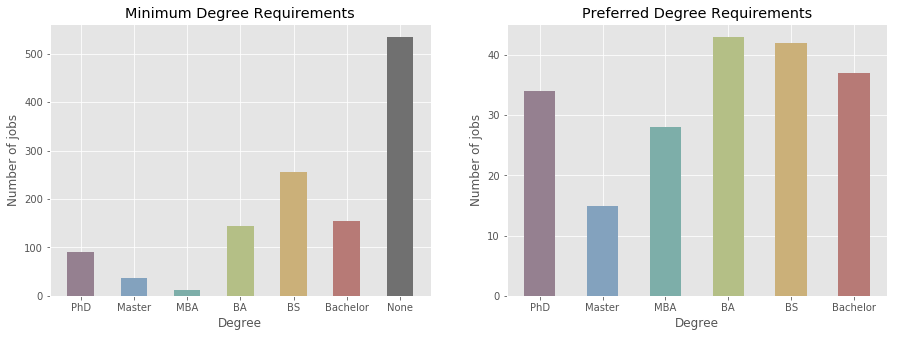

In [6]:
colors = ['#958090', '#83A2BE', '#7DAEA9', '#B4BF86', '#CBB079', '#B77A76', '#707070', '#AAAAAA']

min_labels = list(min_degree_reqs.keys())
min_values = list(min_degree_reqs.values())

pref_labels = list(pref_degree_reqs.keys())
pref_values = list(pref_degree_reqs.values())


plt.figure(figsize=(15, 5))

# In this plot, there will be 1 row, 2 columns.
plt.subplot(1, 2, 1) # Drawing the 1st subplot.
plt.bar(min_labels, min_values, color=colors, width=0.5)
plt.xlabel('Degree')
plt.ylabel('Number of jobs')
plt.title('Minimum Degree Requirements')

plt.subplot(1, 2, 2) # Drawing the 2nd subplot.
plt.bar(pref_labels[:-1], pref_values[:-1], color=colors, width=0.5)
plt.xlabel('Degree')
plt.ylabel('Number of jobs')
plt.title('Preferred Degree Requirements')

plt.show()


In [7]:
def extract_experience(df: pandas.DataFrame, col_name: str, start_year=0, end_year=20):
    """ Extract years of experiences required
    :param df: target dataframe.
    :param col_name: name of the column that contains strings
                     like `4 years of experience in ...`
    :param start_year: the starting year in the list returned.
    :param end_year: the last year in the list returned.
    :return: a list of years of exp required (index by years)
    """
    import re
    
    exp_list = [0] * 21
    
    for col in df[col_name]:
        try:
            exp_required = re.findall('\d+ year', col)
            exp_required =exp_required+ re.findall('\d+\+ year', col)
            year = 0 if not exp_required else int(exp_required[0].replace(' year', '').replace('+', ''))
            exp_list[year] += 1
        except:
            continue
        
    return exp_list

In [8]:
min_exp_list = extract_experience(df, 'minimum_qual')
pref_exp_list = extract_experience(df, 'preferred_qual')

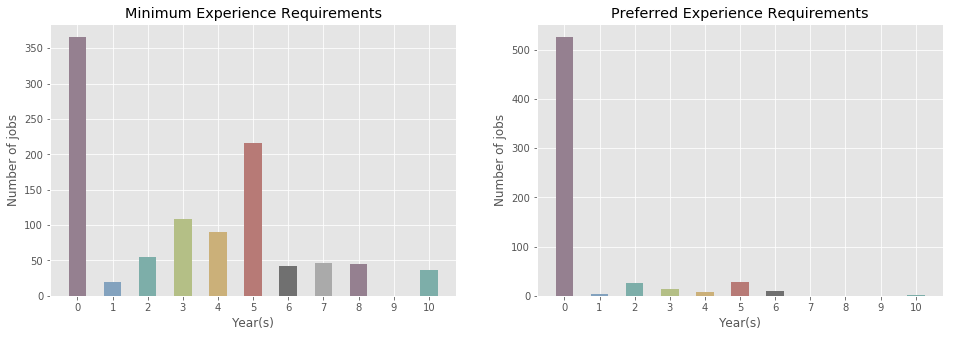

In [9]:
colors = ['#958090', '#83A2BE', '#7DAEA9', '#B4BF86', '#CBB079', '#B77A76', '#707070', '#AAAAAA']
labels = np.arange(len(min_exp_list))

plt.figure(figsize=(16, 5))

# In this plot, there will be 1 row, 2 columns.
plt.subplot(1, 2, 1) # Drawing the 1st subplot.
plt.bar(np.arange(11), min_exp_list[0:11], color=colors, width=0.5)
plt.xticks(labels[0:11])
plt.xlabel('Year(s)')
plt.ylabel('Number of jobs')
plt.title('Minimum Experience Requirements')

plt.subplot(1, 2, 2) # Drawing the 2nd subplot.
plt.bar(labels[0:11], pref_exp_list[0:11], color=colors, width=0.5)
plt.xticks(labels[0:11])
plt.xlabel('Year(s)')
plt.ylabel('Number of jobs')
plt.title('Preferred Experience Requirements')

plt.show()

In [10]:
jobs_freq = {}

for col in df['title']:
    if type(col) is not str:
        continue
    col = col.split(',')[0]
    if col in jobs_freq:
        jobs_freq[col] += 1
    else:
        jobs_freq[col] = 1
        
jobs_freq = dict(sorted(jobs_freq.items(), key=lambda kv: kv[1], reverse=True))

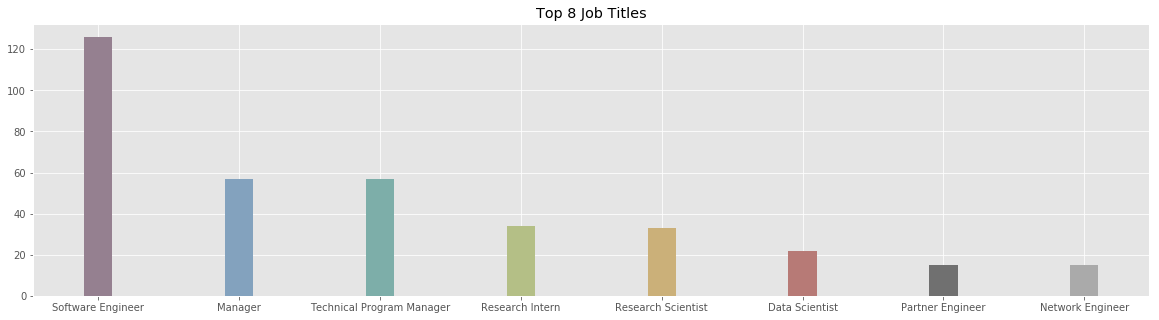

In [11]:
colors = ['#958090', '#83A2BE', '#7DAEA9', '#B4BF86', '#CBB079', '#B77A76', '#707070', '#AAAAAA']

min_labels = list(jobs_freq.keys())[0:8]
min_values = list(jobs_freq.values())[0:8]

plt.figure(figsize=(20, 5))
plt.bar(min_labels, min_values, color=colors, width=0.2)
plt.title('Top 8 Job Titles')
plt.show()

In [12]:
lang_colors = {
    'c++': '#F34B7D',
    'java': '#B07219',
    'python': '#3572A5',
    'javascript': '#F1E05A',
    'go': '#375EAB',
    'rust': '#DEA584',
    'php': '#4F5D95',
    'sql': '#494D5C',
    'ruby': '#701516',
    'swift': '#FFAC45',
    'kotlin': '#F18E33',
    'c#': '#178600',
    'objective c': '#438EFF'
}

In [13]:
langs = lang_colors.keys()

# Count keyword frequency.
min_lang_reqs = count_keywords_freq(df, 'minimum_qual', langs, case_sensitive=False)
pref_lang_reqs = count_keywords_freq(df, 'preferred_qual', langs, case_sensitive=False)

del min_lang_reqs['None']
del pref_lang_reqs['None']

# Sort the dicts.
min_lang_reqs = dict(sorted(min_lang_reqs.items(), key=lambda kv: kv[1], reverse=True))
pref_lang_reqs = dict(sorted(pref_lang_reqs.items(), key=lambda kv: kv[1], reverse=True))

# Create DataFrame from dict.
min_lang_df = pandas.DataFrame.from_dict(min_lang_reqs, orient='index', columns=['Count'])
pref_lang_df = pandas.DataFrame.from_dict(pref_lang_reqs, orient='index', columns=['Count'])

min_lang_reqs

{'c++': 288,
 'java': 275,
 'python': 254,
 'php': 194,
 'go': 180,
 'sql': 140,
 'javascript': 74,
 'c#': 48,
 'ruby': 35,
 'rust': 4,
 'swift': 4,
 'objective c': 3,
 'kotlin': 0}

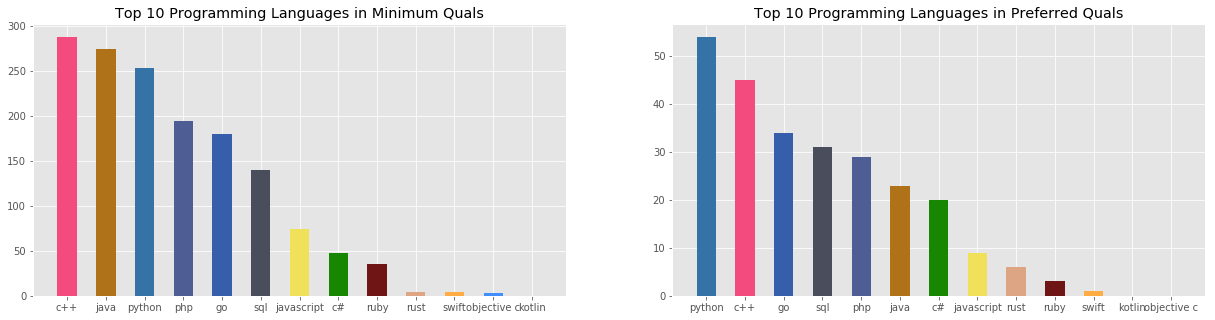

In [14]:
min_labels = list(min_lang_reqs.keys())
min_values = list(min_lang_reqs.values())
min_colors = [lang_colors[k] for k, v in min_lang_reqs.items()]

pref_labels = list(pref_lang_reqs.keys())
pref_values = list(pref_lang_reqs.values())
pref_colors = [lang_colors[k] for k, v in pref_lang_reqs.items()]


plt.figure(figsize=(21, 5))

# In this plot, there will be 1 row, 2 columns.
plt.subplot(1, 2, 1) # Drawing the 1st subplot.
plt.bar(min_labels, min_values, color=min_colors, width=0.5)
plt.title('Top 10 Programming Languages in Minimum Quals')

plt.subplot(1, 2, 2) # Drawing the 2nd subplot.
plt.bar(pref_labels, pref_values, color=pref_colors, width=0.5)
plt.title('Top 10 Programming Languages in Preferred Quals')

plt.show()

In [15]:
def import_terms(tokenizer: nltk.tokenize.MWETokenizer, term_file_path: str):
    """ Import all user-defined untokenizable terms from a file into nltk MWETokenizer.
    :param tokenizer: nltk MWETokenizer instance.
    :param text_file_path: path to the file.
    """
    with open(term_file_path, 'r') as f:
        for line in f:
            tokenizer.add_mwe(line.strip().split())

In [16]:
def tokenize(tokenizer: nltk.tokenize.MWETokenizer, s: str, lowercase=True, preserve_case_words=[]):
    """ Tokenize given string using nltk MWETokenizer.
    :param case: convert all tokens into lowercase.
    :param exclude_words: words that should preserve their cases.
    :return: a list of tokens.
    """
    tokens = nltk.tokenize.word_tokenize(s)
    tokens = tokenizer.tokenize(tokens)
    
    # Remove tokens that are either purely digits or purely punctuations.
    tokens = list(filter(lambda token: not token.isdigit() and re.search('[a-zA-Z]', token), tokens))

    # Since nltk MWETokenizer will not split tokens that contain a slash,
    # we'll have to do it ourselves.
    for token in tokens:
        if '/' in token:
            tokens += token.split('/')
            tokens.remove(token)
            
    # Lowercase conversion.
    tokens = [token.lower() if token not in preserve_case_words else token for token in tokens ]
            
    return tokens

# Usage: tokenize(tokenizer, string, lowercase=True, preserve_case_words=['Go'])
s = r'Fluent in at least one scripting language in addition to Bash (Ruby/Python/Go etc...).'
tokenizer = nltk.tokenize.MWETokenizer(separator=' ')
import_terms(tokenizer, 'cs_term.txt')
tokenize(tokenizer, s, preserve_case_words=lang_colors.keys())

['fluent',
 'in',
 'at',
 'least',
 'one',
 'scripting language',
 'in',
 'addition',
 'to',
 'bash',
 'etc',
 'ruby',
 'python',
 'go']

In [17]:
def create_word_freq_dict(tokenizer, df, col_name, lowercase=True, preserve_case_words=[]):
    """ Create a word frequency dict
    :param tokenizer: nltk MWETokenizer.
    :param df: source pandas dataframe.
    :param col_name: name of the column to create wfm from.
    :param lowercase: convert all tokens into lowercase.
    :param preserve_case_words: words that should preserve their cases.
    :return: a word frequency dict (dict of dict, separated by job indices).
    """
    freq = {}
    
    for i, col in enumerate(df[col_name]):
        if type(col) is not str:
            continue
        freq[i] = {}
        
        words = tokenize(tokenizer, col, lowercase=True, preserve_case_words=preserve_case_words)
        for word in words:
            if word in freq:
                freq[i][word] += 1
            else:
                freq[i][word] = 1
                
    return freq

In [18]:
def create_wfm(word_frequency_dict: dict):
    """ Create word frequency matrix from the specified word frequency dict """
    dwf_list = [pandas.DataFrame(list(freq.values()), index=freq.keys()) for freq in word_frequency_dict.values()]
    wfm = pandas.concat(dwf_list, axis=1)
    wfm = np.transpose(wfm).fillna(0)
    wfm.index = word_frequency_dict.keys()
    return wfm

In [19]:
tokenizer = nltk.tokenize.MWETokenizer(separator=' ')
import_terms(tokenizer, 'cs_term.txt')

# Words that 
preserve_case_words = ['Go', '.Net', '.NET']

min_qual_wfd = create_word_freq_dict(tokenizer, df, 'minimum_qual', True, preserve_case_words)
pref_qual_wfd = create_word_freq_dict(tokenizer, df, 'preferred_qual', True, preserve_case_words)
resp_qual_wfd = create_word_freq_dict(tokenizer, df, 'responsibilities', True, preserve_case_words)

list(min_qual_wfd[0].items())[0:10]

[('masters', 1),
 ('degree', 1),
 ('or', 1),
 ('doctorate', 1),
 ('in', 1),
 ('fields', 1),
 ('related', 1),
 ('to', 1),
 ('computer science', 1),
 ('and', 1)]

In [20]:
min_qual_wfm = create_wfm(min_qual_wfd)
pref_qual_wfm = create_wfm(pref_qual_wfd)
resp_wfm = create_wfm(resp_qual_wfd)

# Row: job, Column: word frequency
pref_qual_wfm.head(5)

C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  after removing the cwd from sys.path.


,,'s,100g,100k,10k,16th,19th,1tb,22nd,23rd,...,www,x264,xen,xml,yarn,year,years,you,your,zero
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [21]:
def create_tfm(wfm):
    tfm = wfm.copy()
    for i in range(0, len(tfm)):
        tfm.iloc[i] = tfm.iloc[i] / tfm.iloc[i].sum()
    return tfm

min_qual_tfm = create_tfm(min_qual_wfm)
pref_qual_tfm = create_tfm(pref_qual_wfm)
resp_tfm = create_tfm(resp_wfm)

min_qual_tfm.head()

,,'guerrilla,'hermetic,'how,'move,'re,'s,'what,*nix,-h.264,...,year,years,yeas,you,your,zemax,zeromq,zones,µarchitecture,échelle
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.022222,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.029412,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.025641,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [22]:
min_qual_df = (min_qual_wfm > 0).sum()
pref_qual_df = (pref_qual_wfm > 0).sum()
resp_df = (resp_wfm > 0).sum()

In [23]:
N = len(df)
N

1064

In [24]:
def create_tfidfm(tfm, N, df):
    tfidfm = tfm.copy()
    for i in range(0, len(tfidfm)):
        # Add 0.01 to not completely ignore irregular words.
        tfidfm.iloc[i] = tfidfm.iloc[i] * np.log10(N / df) + 0.01
    return tfidfm
    
min_qual_tfidfm = create_tfidfm(min_qual_tfm, N, min_qual_df)
pref_qual_tfidfm = create_tfidfm(pref_qual_tfm, N, pref_qual_df)
resp_tfidfm = create_tfidfm(resp_tfm, N, resp_df)

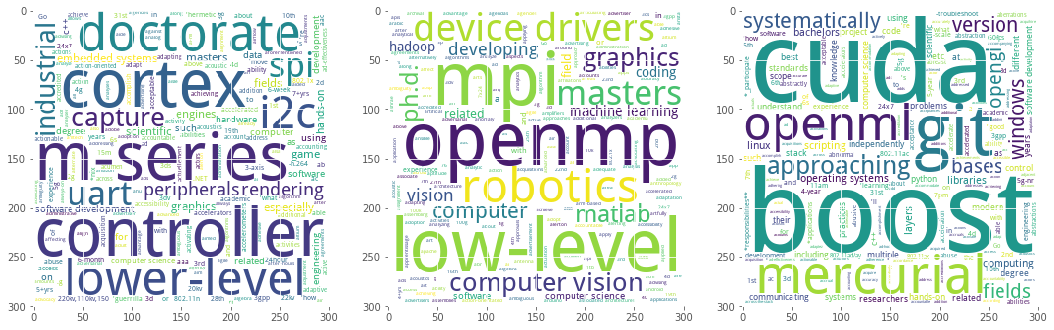

In [25]:
#font_path = r'/usr/share/fonts/dejavu/DejaVuSans.ttf'
linux_font = r'wqy-microhei.ttc'
plt.figure(figsize=(18, 6))

# Minimum Qualification Word Cloud
ax1 = plt.subplot(131)
plot_tfidf_wordcloud(min_qual_tfidfm, text_index=0, ax=ax1, font_path=linux_font, height=300, width=300)

# Preferred Qualification Word Cloud
ax2 = plt.subplot(132)
plot_tfidf_wordcloud(pref_qual_tfidfm, text_index=0, ax=ax2, font_path=linux_font, height=300, width=300)

# Responsibilities Word Cloud
ax3 = plt.subplot(133)
plot_tfidf_wordcloud(resp_tfidfm, text_index=0, ax=ax3, font_path=linux_font, height=300, width=300)

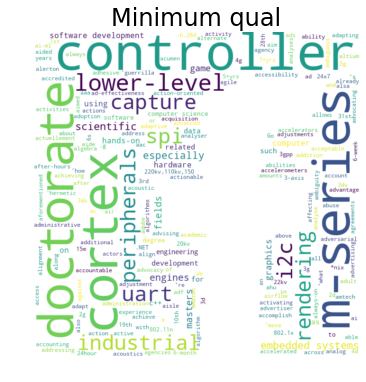

In [26]:
#from wordcloud import WordCloud, ImageColorGenerator
#from PIL import Image
#import seaborn as sns
#%matplotlib inline
#import matplotlib.pyplot as plt
#import pandas as pd
#import numpy as np

#G = np.array(Image.open('fb-icon.png'))
# I spent a while to realize that the image must be black-shaped to be a mask

#Res_AN = ' '.join(df['minimum_qual'].tolist())

#sns.set(rc={'figure.figsize':(11.7,8.27)})

#wordcloud = WordCloud(mask=G,background_color="white").generate(Res_AN)
#plt.figure()
#plt.imshow(wordcloud, interpolation="bilinear")
#plt.axis("off")
#plt.margins(x=0, y=0)
#plt.title('Responsibilites',size=24)
#plt.show()


from wordcloud import WordCloud, ImageColorGenerator
from PIL import Image
G = np.array(Image.open('fb-icon.png'))
tfidf_dict = min_qual_tfidfm.to_dict(orient='records')
wordcloud = WordCloud(mask=G,background_color="white").fit_words(tfidf_dict[0])

plt.figure(figsize=(18,6))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.margins(x=0, y=0)
plt.title('Minimum qual',size=24)
plt.show()



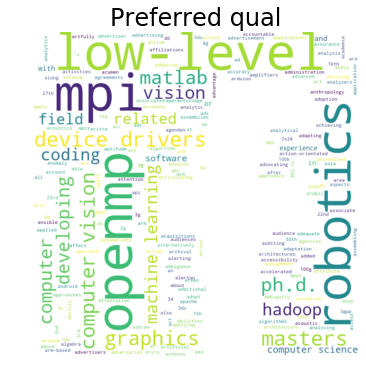

In [27]:
tfidf_dict = pref_qual_tfidfm.to_dict(orient='records')
wordcloud = WordCloud(mask=G,background_color="white").fit_words(tfidf_dict[0])

plt.figure(figsize=(18,6))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.margins(x=0, y=0)
plt.title('Preferred qual',size=24)
plt.show()

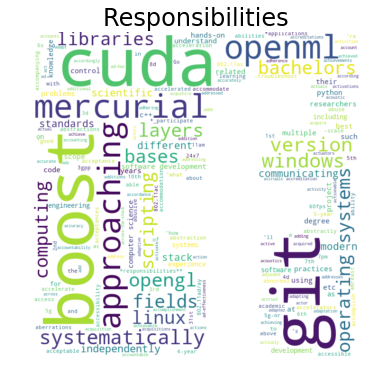

In [28]:
tfidf_dict = resp_tfidfm.to_dict(orient='records')
wordcloud = WordCloud(mask=G,background_color="white").fit_words(tfidf_dict[0])

plt.figure(figsize=(18,6))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.margins(x=0, y=0)
plt.title('Responsibilities',size=24)
plt.show()

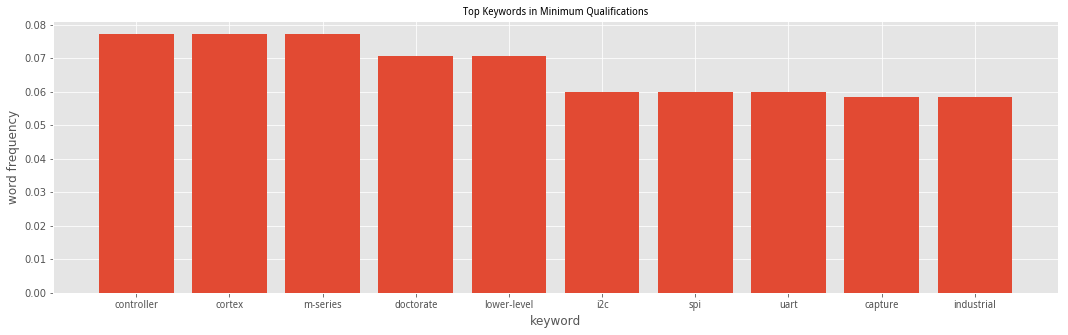

In [29]:
plt.figure(figsize=(18, 5))
ax1 = plt.subplot(1, 1, 1)
plt.xlabel('keyword')
plt.ylabel('word frequency')
title = 'Top Keywords in Minimum Qualifications'
plot_tfidf_bar(min_qual_tfidfm, text_index=0, ax=ax1, font_path=linux_font, bin=10, title=title)

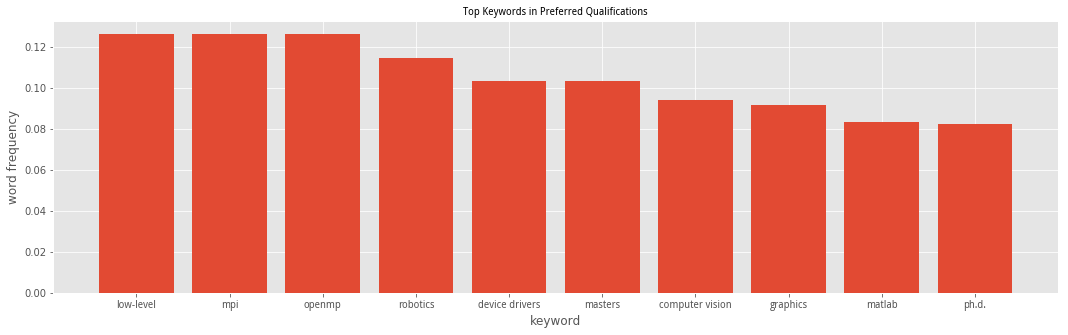

In [30]:
plt.figure(figsize=(18, 5))
ax1 = plt.subplot(1, 1, 1)
plt.xlabel('keyword')
plt.ylabel('word frequency')
title = 'Top Keywords in Preferred Qualifications'
plot_tfidf_bar(pref_qual_tfidfm, text_index=0, ax=ax1, font_path=linux_font, bin=10, title=title)

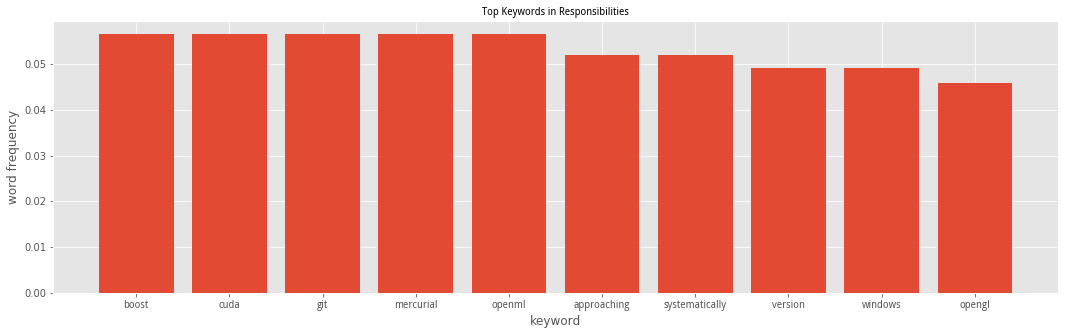

In [31]:
plt.figure(figsize=(18, 5))
ax1 = plt.subplot(1, 1, 1)
plt.xlabel('keyword')
plt.ylabel('word frequency')
title = 'Top Keywords in Responsibilities'
plot_tfidf_bar(resp_tfidfm, text_index=0, ax=ax1, font_path=linux_font, bin=10, title=title)

In [34]:
from geopy.geocoders import Nominatim
geolocator = Nominatim(user_agent='myapplication')
dic={}
num_dic={}
key_v=[]
lat=[]
lon=[]
for lo in df['location']:
    if lo in dic:
        num_dic[lo]=num_dic[lo]+1;
        continue
    if type(lo) is str:
        num_dic[lo]=1;
    try:
        location = geolocator.geocode(lo)
        dic[lo]=(location.latitude,location.longitude)
        key_v.append(lo)
        lat.append(location.latitude)
        lon.append(location.longitude)
        print(dic[lo])
    except:
        print('error')       
print(len(dic))
    #try:
        #location = geolocator.geocode(lo)
        #arr.append((location.lat,location.lon))
    #except:
        #print("ERROR")
        #arr.append(('none','none'))

(40.4416941, -79.9900861)
(37.4538274, -122.1821871)
(47.6694141, -122.1238767)
(32.7762719, -96.7968559)
(51.5073219, -0.1276474)
(47.6038321, -122.3300624)
(49.7031267, -123.1378341)
(34.0536834, -118.2427669)
(47.3769434, 8.5414061)
(42.3602534, -71.0582912)
(32.0804808, 34.7805274)
(45.42226195, -75.6397071198492)
(40.7308619, -73.9871558)
(30.2711286, -97.7436995)
(48.8265445, -123.6264973)
(51.8979282, -8.4705806)
(38.8950092, -77.0365625)
(1.2904753, 103.8520359)
(48.8566101, 2.3514992)
(53.3497645, -6.2602732)
(45.5073725, -73.6050824)
(34.729847, -86.5859011)
(44.2998261, -120.834972)
(41.1544433, -96.0422378)
(34.8142093, -106.7613067)
(43.2624559, -93.6371591)
(53.4104332, -6.4404037)
(37.8590272, -122.4854694)
(22.2793278, 114.1628131)
(41.6441557, -93.4646571)
(40.3066676, -112.0147617)
(28.4646148, 77.0299194)
(31.2253441, 121.4888922)
(37.3688301, -122.0363496)
(49.2850624, -123.135817450772)
(-23.5506507, -46.6333824)
(39.0437192, -77.4874899)
(45.4972159, -73.6103642)


In [33]:
from geopy.geocoders import Nominatim
geolocator = Nominatim(user_agent='myapplication')
location = geolocator.geocode("Chicago Illinois")
print(location.latitude)

41.8755616


In [35]:
num=[]
for key, value in num_dic.items():
    num.append(num_dic[key])

In [36]:
key_v

['Pittsburgh, PA',
 'Menlo Park, CA',
 'Redmond, WA',
 'Dallas, TX',
 'London, United Kingdom',
 'Seattle, WA',
 'Northridge, CA',
 'Los Angeles, CA',
 'Zurich, Switzerland',
 'Boston, MA',
 'Tel Aviv, Israel',
 'San Francisco, CA',
 'New York, NY',
 'Austin, TX',
 'Woodland Hills, CA',
 'Cork, Ireland',
 'Washington, DC',
 'Singapore',
 'Paris, France',
 'Dublin, Ireland',
 'Mountain View, CA',
 'Huntsville, AL',
 'Prineville, OR',
 'Papillion, NE',
 'Los Lunas, NM',
 'Forest City, NC',
 'Clonee, Ireland',
 'Sausalito, CA',
 'Hong Kong',
 'Altoona, IA',
 'Eagle Mountain, Utah',
 'Gurgaon, India',
 'Shanghai, China',
 'Sunnyvale, CA',
 'Fremont, CA',
 'São Paulo, Brazil',
 'Ashburn, VA',
 'Montreal, Canada',
 'Toronto, Canada',
 'Brasilia, Brazil',
 'Sydney, Australia',
 'Henrico, VA',
 'Milan, Italy',
 'Stockholm, Sweden',
 'Chicago, IL',
 'Buenos Aires, Argentina',
 'New Albany, OH',
 'Fort Worth, TX',
 'Warsaw, Poland',
 'Johannesburg, South Africa',
 'Luleå, Sweden',
 'Odense, Denm

In [37]:
bf = pandas.DataFrame(
    {'City':key_v,
     'Number of jobs':num})

In [60]:
import pandas as pd # Reading csv file 
from shapely.geometry import Point # Shapely for converting latitude/longtitude to geometry
import geopandas as gpd # To create GeodataFrame
geometry = [Point(xy) for xy in zip(lon, lat)]
# Coordinate reference system : WGS84
crs = {'init': 'epsg:4326'}
# Creating a Geographic data frame 
gdf = gpd.GeoDataFrame(bf, crs=crs, geometry=geometry)
gdf
#cities.plot(ax=base, marker='o', color='red', markersize=5);

,City,Number of jobs,geometry
0,"Pittsburgh, PA",12,POINT (-79.9900861 40.4416941)
1,"Menlo Park, CA",419,POINT (-122.1821871 37.4538274)
2,"Redmond, WA",118,POINT (-122.1238767 47.6694141)
3,"Dallas, TX",3,POINT (-96.7968559 32.7762719)
4,"London, United Kingdom",81,POINT (-0.1276474 51.5073219)
5,"Seattle, WA",95,POINT (-122.3300624 47.6038321)
6,"Northridge, CA",4,POINT (-123.1378341 49.7031267)
7,"Los Angeles, CA",6,POINT (-118.2427669 34.0536834)
8,"Zurich, Switzerland",10,POINT (8.5414061 47.3769434)
9,"Boston, MA",11,POINT (-71.0582912 42.3602534)


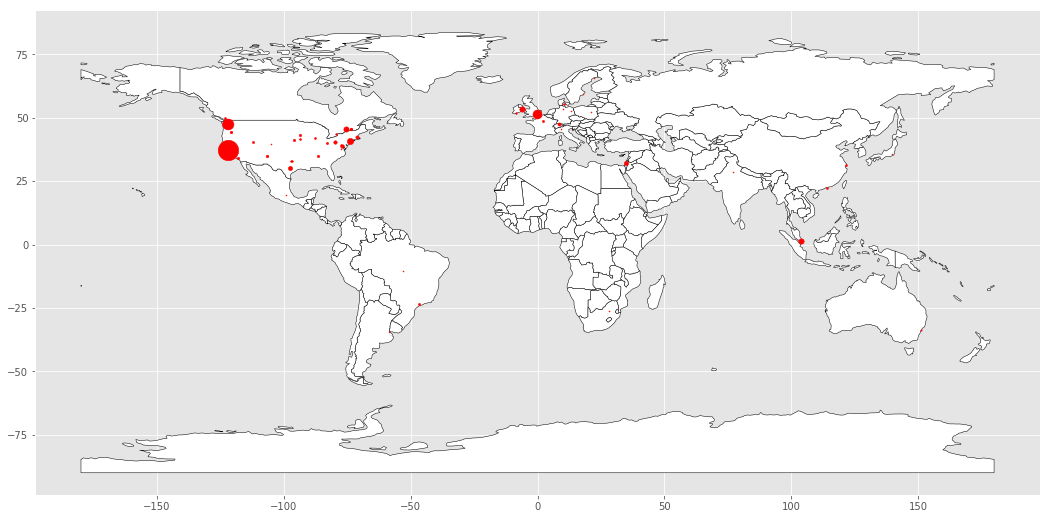

In [71]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
base = world.plot(color='white', edgecolor='black',figsize=(18,16))
#gdf.plot(ax=base, marker='o', color='red', markersize=5);
ax=base
for key, value in num_dic.items():
    ax.scatter(dic[key][1],dic[key][0],s=num_dic[key],c='r',marker='o')

In [72]:
loc_csv_arr=[]
for a in range(0,len(key)):
    loc_csv_arr.append({
        'key': key_v[a],
        'longitude': lon[a],
        'latitude': lat[a]
        })

In [73]:
from bokeh.io import output_file, output_notebook, show
from bokeh.plotting import figure, output_file, show, ColumnDataSource
output_notebook()

Loading BokehJS ...

In [74]:
def convert_GeoPandas_to_Bokeh_format(gdf):
    """
    Function to convert a GeoPandas GeoDataFrame to a Bokeh
    ColumnDataSource object.
    
    :param: (GeoDataFrame) gdf: GeoPandas GeoDataFrame with polygon(s) under
                                the column name 'geometry.'
                                
    :return: ColumnDataSource for Bokeh.
    """
    gdf_new= gdf.drop('geometry', axis=1).copy()

    gdf_new['x'] = gdf.apply(getGeometryCoords, 
                             geom='geometry', 
                             coord_type='x', 
                             shape_type='polygon', 
                             axis=1)
    
    gdf_new['y'] = gdf.apply(getGeometryCoords, 
                             geom='geometry', 
                             coord_type='y', 
                             shape_type='polygon', 
                             axis=1)
    
    return ColumnDataSource(gdf_new)


def getGeometryCoords(row, geom, coord_type, shape_type):
    """
    Returns the coordinates ('x' or 'y') of edges of a Polygon exterior.
    
    :param: (GeoPandas Series) row : The row of each of the GeoPandas DataFrame.
    :param: (str) geom : The column name.
    :param: (str) coord_type : Whether it's 'x' or 'y' coordinate.
    :param: (str) shape_type
    """
    
    # Parse the exterior of the coordinate
    if shape_type == 'polygon':
        try:
            exterior = row[geom].exterior
        except:
            exterior = row[geom].geom[0].exterior
        
        if coord_type == 'x':
            # Get the x coordinates of the exterior
            return list( exterior.coords.xy[0] )    
        
        elif coord_type == 'y':
            # Get the y coordinates of the exterior
            return list( exterior.coords.xy[1] )

    elif shape_type == 'point':
        exterior = row[geom]
    
        if coord_type == 'x':
            # Get the x coordinates of the exterior
            return  exterior.coords.xy[0][0] 

        elif coord_type == 'y':
            # Get the y coordinates of the exterior
            return  exterior.coords.xy[1][0]

In [75]:
world.head()

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,28400000.0,Asia,Afghanistan,AFG,22270.0,"POLYGON ((61.21081709172574 35.65007233330923,..."
1,12799293.0,Africa,Angola,AGO,110300.0,(POLYGON ((16.32652835456705 -5.87747039146621...
2,3639453.0,Europe,Albania,ALB,21810.0,"POLYGON ((20.59024743010491 41.85540416113361,..."
3,4798491.0,Asia,United Arab Emirates,ARE,184300.0,"POLYGON ((51.57951867046327 24.24549713795111,..."
4,40913584.0,South America,Argentina,ARG,573900.0,(POLYGON ((-65.50000000000003 -55.199999999999...


In [76]:
def explode(gdf):

    gs = gdf.explode()
    gdf2 = gs.reset_index().rename(columns={0: 'geometry'})
    gdf_out = gdf2.merge(gdf.drop('geometry', axis=1), left_on='level_0', right_index=True)
    gdf_out = gdf_out.set_index(['level_0', 'level_1']).set_geometry('geometry')
    gdf_out.crs = gdf.crs
    return gdf_out

In [77]:
world_Source = convert_GeoPandas_to_Bokeh_format(explode(world))

In [78]:
from bokeh.models import (
    Range1d,
    GeoJSONDataSource,
    HoverTool,
    LinearColorMapper,
    GMapPlot, GMapOptions, ColumnDataSource, 
    Circle, DataRange1d, PanTool, WheelZoomTool, BoxSelectTool
)

In [79]:
gdf.head()

,City,Number of jobs,geometry
0,"Pittsburgh, PA",12,POINT (-79.9900861 40.4416941)
1,"Menlo Park, CA",419,POINT (-122.1821871 37.4538274)
2,"Redmond, WA",118,POINT (-122.1238767 47.6694141)
3,"Dallas, TX",3,POINT (-96.7968559 32.7762719)
4,"London, United Kingdom",81,POINT (-0.1276474 51.5073219)


In [80]:
gdf['x'] = gdf.apply(getGeometryCoords, 
                                 geom='geometry', 
                                 coord_type='x', 
                                 shape_type='point',
                                 axis=1)
                                 
gdf['y'] = gdf.apply(getGeometryCoords, 
                                 geom='geometry', 
                                 coord_type='y', 
                                 shape_type='point',
                                 axis=1)

gdf = gdf.drop(['geometry'],axis=1)

In [81]:
point_source = ColumnDataSource(data=dict(x=gdf['x'],
                                      y=gdf['y'],
                                      City=gdf['City'].values,
                                      NumberofJobs=gdf['Number of jobs'].values))

In [82]:
TOOLS = "pan,wheel_zoom,box_zoom,reset,hover,save"

In [83]:
Elevated = figure(title="FaceBook",
            tools=TOOLS,
            x_axis_location=None, 
            y_axis_location=None, plot_width=900, plot_height=450)

In [84]:
Elevated.multi_line('x', 
                    'y', 
                    source=world_Source, 
                    color="gray", 
                    line_width=1)

GlyphRenderer(id='1187', ...)

In [85]:
Elevated.circle('x', 
                'y', 
                source=point_source, 
                size=5)

GlyphRenderer(id='1194', ...)

In [86]:
hover = Elevated.select_one(HoverTool)
hover.point_policy = "follow_mouse"

In [89]:
output_file("fb_map.html")
TOOLTIPS = """
    <div>
        <div>
            <span style="font-size: 15px; font-weight: bold;">City:</span>
            <span style="font-size: 17px; font-weight: bold;">@City</span>
        </div>
        <div>
            <span style="font-size: 15px;">Location:</span>
            <span style="font-size: 10px; color: #696;">($x, $y)</span>
        </div>
        <div>
            <span style="font-size: 15px;">NumberofJobs:</span>
            <span style="font-size: 10px; color: #696;">@NumberofJobs</span>
        </div>
    </div>
"""
hover.tooltips=TOOLTIPS

In [90]:
show(Elevated)